In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
from shapely.geometry import Polygon
import matplotlib.pyplot as plt
import matplotlib

In [6]:
df = pd.DataFrame({'x': [1, 1, 2,2], 'y': [1, 2, 1,2], 'statut': [0, 0, 1,1]})

In [59]:
df

,x,y,statut
0,1,1,0
1,1,2,0
2,2,1,1
3,2,2,1


In [7]:
geometry = gpd.points_from_xy(df['x'], df['y'])
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df['x'], df['y']))

In [96]:
fond = gdf.copy()
fond.geometry = fond.geometry.buffer(10) 

In [70]:
geometry = [gdf[:2].geometry.union_all().convex_hull.buffer(0.5),gdf[2:].geometry.union_all().convex_hull.buffer(0.5)]
units1 = gpd.GeoDataFrame(pd.DataFrame({'statut' : [0,1]}), geometry=geometry)

In [71]:
geometry = [gdf.iloc[[0,2]].geometry.union_all().convex_hull.buffer(0.5),gdf.iloc[[1,3]].geometry.union_all().convex_hull.buffer(0.5)]
units2 = gpd.GeoDataFrame(pd.DataFrame({'statut' : [0,1]}), geometry=geometry)

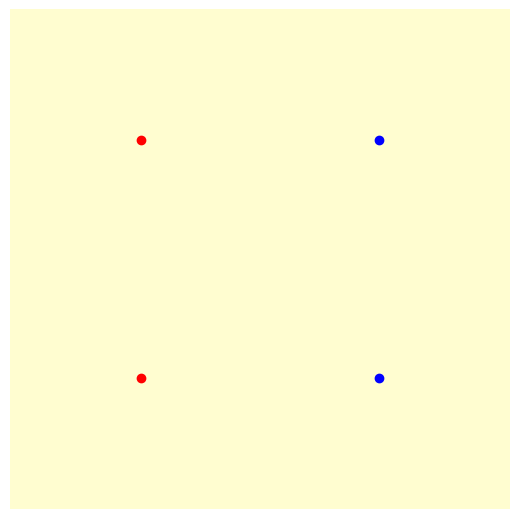

In [108]:

ax = gdf[gdf.statut==0].plot( color='red',figsize=(5,5), zorder=2)
fond.plot(color="#FFFDD0",ax=ax, zorder=1)
plt.subplots_adjust(bottom=0, right=1, top=1, left=0)
gdf[gdf.statut==1].plot(color='blue',ax=ax, zorder=3)
ax.set_xlim(0.45, 2.55)
ax.set_ylim(0.45, 2.55)
ax.set_axis_off()
plt.savefig("maup1.svg", format='svg')

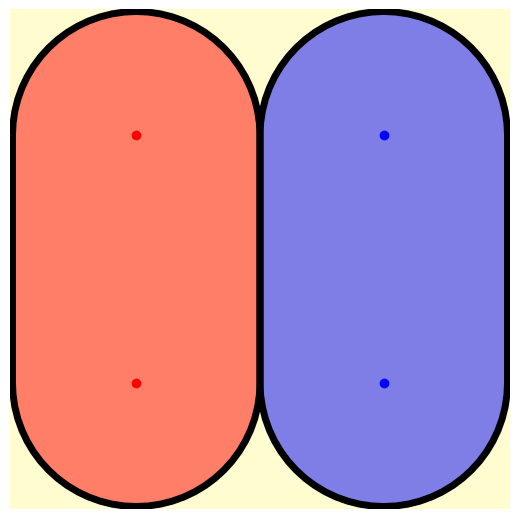

In [112]:
ax = gdf[gdf.statut==0].plot( color='red',figsize=(5,5), zorder=4)
fond.plot(color="#FFFDD0",ax=ax, zorder=1)
plt.subplots_adjust(bottom=0, right=1, top=1, left=0)
gdf[gdf.statut==1].plot(color='blue',ax=ax,zorder=5)
units1[units1.statut==0].plot(ax=ax, zorder=2, color='red', alpha=.5)
units1[units1.statut==1].plot(ax=ax, zorder=1, color='blue', alpha=.5)
units1.boundary.plot(ax=ax, zorder=2, color="black", linewidth=5)
ax.set_xlim(0.49, 2.51)
ax.set_ylim(0.49, 2.51)
ax.set_axis_off()
plt.savefig("maup2.svg", format='svg')

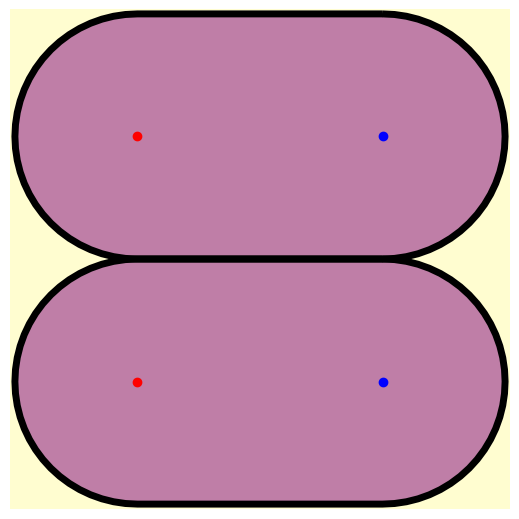

In [114]:
ax = gdf[gdf.statut==0].plot( color='red',figsize=(5,5), zorder=4)
fond.plot(color="#FFFDD0",ax=ax, zorder=1)
gdf[gdf.statut==1].plot(color='blue',ax=ax, zorder=5)
plt.subplots_adjust(bottom=0, right=1, top=1, left=0)
units2[units2.statut==0].plot(ax=ax, zorder=2, color='purple', alpha=.5)
units2[units2.statut==1].plot(ax=ax, zorder=3, color='purple', alpha=.5)
units2.boundary.plot(ax=ax, zorder=4, color="black", linewidth=5)
ax.set_xlim(0.48, 2.52)
ax.set_ylim(0.48, 2.52)
ax.set_axis_off()
plt.savefig("maup3.svg", format='svg')